# Intermediate Data Visualization with Seaborn

👋 Welcome to your workspace! Here, you can write and run Python code and add text in [Markdown](https://www.markdownguide.org/basic-syntax/). Below, we've imported the datasets from the course _Intermediate Data Visualization with Seaborn_ as DataFrames as well as the packages used in the course. This is your sandbox environment: analyze the course datasets further, take notes, or experiment with code!

In [165]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing course datasets as DataFrames
bike_share = pd.read_csv('datasets/bike_share.csv')
college_data = pd.read_csv('datasets/college_datav3.csv')
daily_show = pd.read_csv('datasets/daily_show_guests_cleaned.csv')
insurance = pd.read_csv('datasets/insurance_premiums.csv')
grants = pd.read_csv('datasets/schoolimprovement2010grants.csv', index_col=0)
pay_sys= pd.read_csv('./datasets/Inpatient_Prospective_Payment_System.csv')

college_data.head(1) # Display the first five rows of this DataFrame

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City


In [26]:
pay_sys.columns

Index(['DRG_definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', 'AVG_covered_charges ', ' AVG_total_payments ',
       'AVG_medicare_payments'],
      dtype='object')

In [28]:
pay_sys = pay_sys.rename(columns={'DRG_definition': 'DRG Definition',
                                 ' Total Discharges ': 'Total Discharges',
                                 'AVG_covered_charges ': 'AVG Covered Charges',
                                 ' AVG_total_payments ': 'AVG Total Payments',
                                 'AVG_medicare_payments': 'AVG Medicare Payments'})

## Categorical Plot Types

### Categorical Data
- Data which takes on a limited and fixed number of values
- Normally combined with numeric data
- Examples include:
    - Geography (country, state, region)
    - Gender
    - Ethnicity
    - Blood type
    - Eye color

### Plot types 
- ***show each observation***
- ***Abstract Representations***
- ***statistical estimates***

#### Plot types - show each observation
- `sns.stripplot()`
- `sns.swarmplot()`
<img src = "./media/showeachobservation.png">

##### `stripplot()`

In [98]:
pay_sys1  = pay_sys[5000:9000]

<AxesSubplot:xlabel='AVG Covered Charges', ylabel='DRG Definition'>

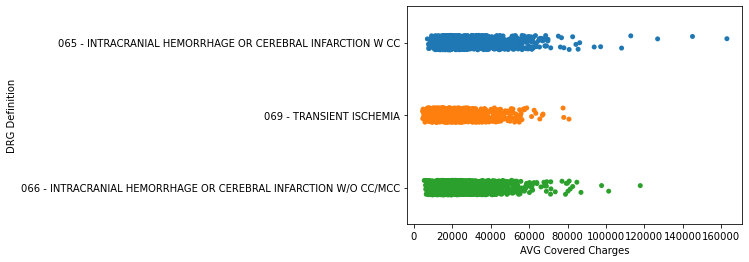

In [59]:
sns.stripplot(data=pay_sys1, y="DRG Definition", x='AVG Covered Charges', jitter=True)

<AxesSubplot:xlabel='AVG Covered Charges', ylabel='DRG Definition'>

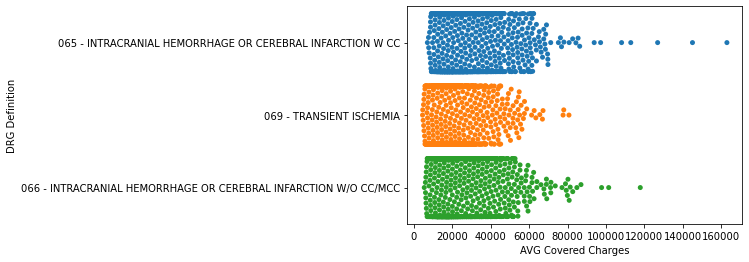

In [61]:
sns.swarmplot(data=pay_sys1,  y="DRG Definition", x='AVG Covered Charges')

<AxesSubplot:xlabel='AVG Covered Charges', ylabel='DRG Definition'>

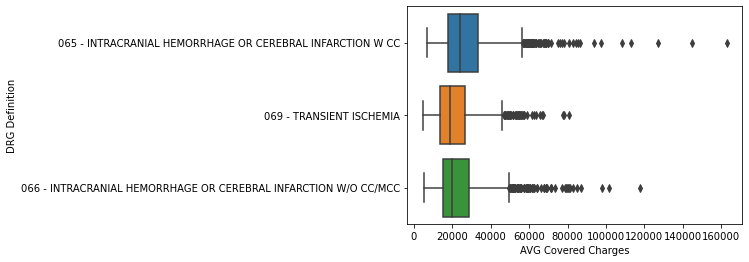

In [62]:
sns.boxplot(data=pay_sys1,  y="DRG Definition", x='AVG Covered Charges')

<AxesSubplot:xlabel='AVG Covered Charges', ylabel='DRG Definition'>

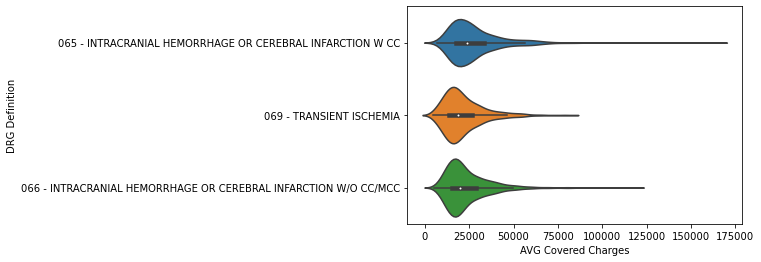

In [63]:
sns.violinplot(data=pay_sys1,  y="DRG Definition", x='AVG Covered Charges')

In [73]:
sns.lvplot(data=pay_sys1,  y="DRG Definition", x='AVG Covered Charges')

AttributeError: module 'seaborn' has no attribute 'lvplot'

In [96]:
pay_sys2  = pay_sys[5000:5350]

<AxesSubplot:xlabel='AVG Covered Charges', ylabel='DRG Definition'>

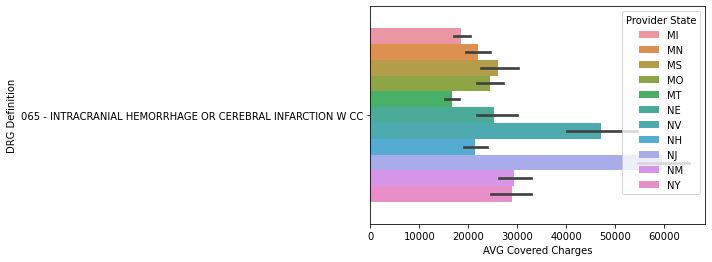

In [97]:
sns.barplot(data=pay_sys2,  y="DRG Definition", x='AVG Covered Charges', hue=)

In [94]:
pay_sys3  = pay_sys[5000:5200]

<AxesSubplot:xlabel='AVG Covered Charges', ylabel='DRG Definition'>

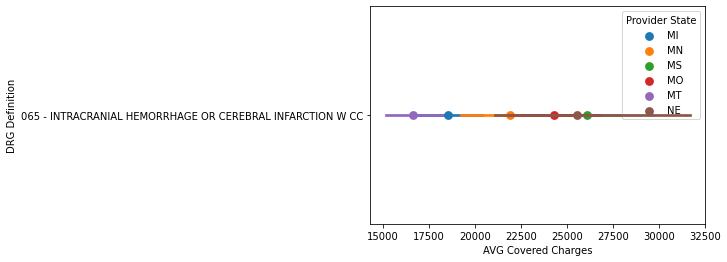

In [95]:
sns.pointplot(data=pay_sys3,  y="DRG Definition", x='AVG Covered Charges', hue='Provider State')

<AxesSubplot:xlabel='count', ylabel='DRG Definition'>

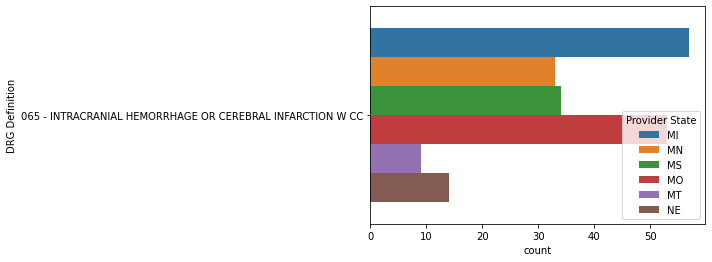

In [102]:
sns.countplot(data=pay_sys3, y="DRG Definition", hue='Provider State')

## Regression Plots

### Bicycle Dataset
- Aggregated bicycle sharing data in Washington DC
- Data includes:
    - Rental amounts
    - Weather information
    - Calendar information
- Can we predict rental amounts?


### Plotting with regplot()

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

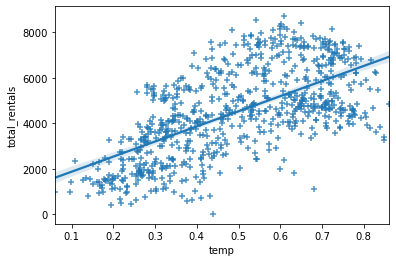

In [103]:
sns.regplot(data=bike_share, x='temp',y='total_rentals', marker='+')

### Evaluating regression with residplot()
- A residual plot is useful for evaluating the fit of a model
- Seaborn supports through `residplot` function

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

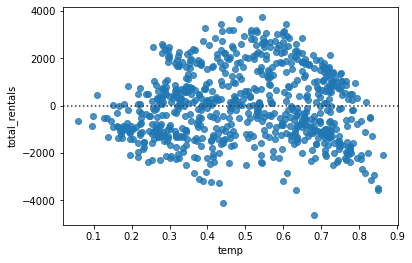

In [104]:
sns.residplot(data=bike_share, x='temp', y='total_rentals')

### Polynomial regression
- Seaborn supports polynomial regression using the `order` parameter

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

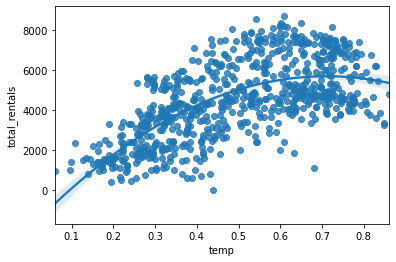

In [106]:
sns.regplot(data=bike_share, x='temp', y='total_rentals', order=2)

### residplot with polynomial regression

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

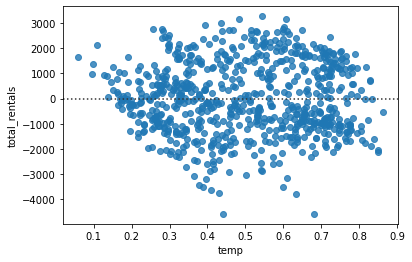

In [107]:
sns.residplot(data=bike_share, x='temp', y='total_rentals', order=2)

### Categorical values

<AxesSubplot:xlabel='mnth', ylabel='total_rentals'>

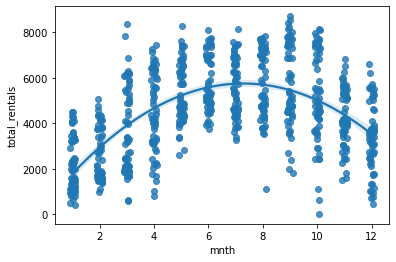

In [109]:
sns.regplot(data=bike_share, x='mnth', y='total_rentals', x_jitter=.1, order=2)

### Estimators
- In some cases, an `x_estimator` can be useful for highlightingtrends

<AxesSubplot:xlabel='mnth', ylabel='total_rentals'>

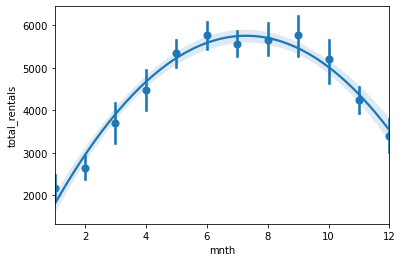

In [111]:
sns.regplot(data=bike_share, x='mnth', y='total_rentals', x_estimator= np.mean, order=2)

### Binning the data
- `x_bins` can be used to divide the data into discrete bins
- The regression line is still fit against all the data 

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

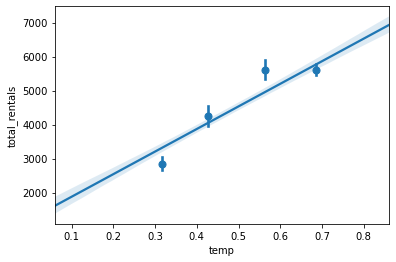

In [112]:
sns.regplot(data=bike_share, x='temp', y='total_rentals', x_bins=4)

## Matrix Plots

### Getting data in the right format
- Seaborn's `heatmap()` function requires data to be in a grid format
- pandas `crosstab()` is frequently used to manipulate the data

In [157]:
pd.crosstab(bike_share['mnth'], bike_share['weekday'], values=bike_share['total_rentals'], aggfunc='mean').round()

weekday,0,1,2,3,4,5,6
mnth,,,,,,,
1,1816.0,1927.0,2568.0,2139.0,2513.0,2446.0,1957.0
2,2248.0,2604.0,2824.0,2813.0,2878.0,2933.0,2266.0
3,3301.0,3546.0,3574.0,3670.0,3817.0,3926.0,3939.0
4,4417.0,4516.0,4556.0,4331.0,4764.0,4387.0,4446.0
5,5320.0,4512.0,5025.0,5119.0,5893.0,5751.0,5978.0
6,5940.0,5478.0,5681.0,5701.0,5622.0,5616.0,6344.0
7,5298.0,5792.0,5844.0,5814.0,5624.0,5406.0,5232.0
8,4703.0,5518.0,5930.0,6077.0,6038.0,5958.0,5224.0
9,6160.0,5637.0,5184.0,5668.0,5486.0,5747.0,6394.0


### Build a heatmap

<AxesSubplot:xlabel='weekday', ylabel='mnth'>

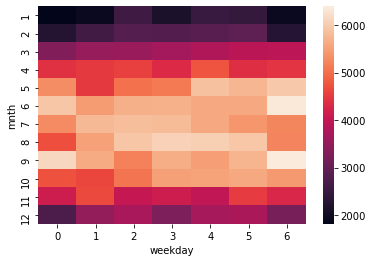

In [158]:
sns.heatmap(df_crosstab)

### Customize a heatmap

<AxesSubplot:xlabel='weekday', ylabel='mnth'>

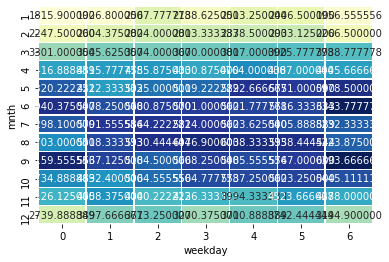

In [161]:
sns.heatmap(df_crosstab,annot= True, fmt="f", cmap="YlGnBu", cbar=False, linewidths=.5)

### Centering a heatmap
- Seaborn support centering the heatmap colors on a specific value

<AxesSubplot:xlabel='weekday', ylabel='mnth'>

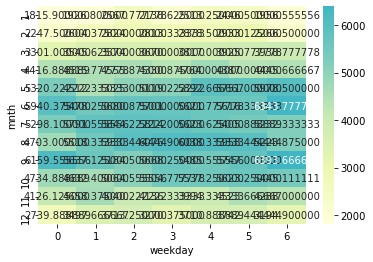

In [162]:
sns.heatmap(df_crosstab, annot=True, fmt="f",cmap="YlGnBu", cbar=True,center=df_crosstab.loc[9, 6])

### Plotting a correlation matrix
- Pandas `corr` function calculates correlations between
- columns in a dataframe
- The output can be converted to a heatmap with seaborn

<AxesSubplot:>

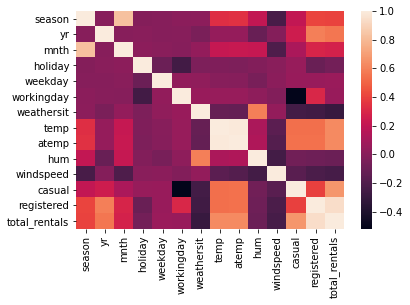

In [163]:
sns.heatmap(bike_share.corr())

## PRACTISE